<a href="https://colab.research.google.com/github/enthusiham/Master-s-thesis-/blob/main/10.%20Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df_main = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_main_final.csv")
df_refer = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_refer_final.csv")

In [ ]:
df_main_scaled = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_main_final_scaled.csv")

In [ ]:
df_main = df_main[['n_citation', 'title_len',	'n_references',		'impact_1y', 'n_authors',	'ab_len','verb_ratio',	'readability_score',
                   'mean_ref_ab_len', 'sd_ref_ab_len',	'ref_verb_ratio',	
                   'main_journal',	'main_conf',	'main_review',	'main_meta',
                   'count_ref_conf',	'count_ref_journal',	'count_ref_meta',	'count_ref_review',	
                   'mean_ref_n_authors','sd_ref_n_authors', 'mean_ref_n_ref',	'sd_ref_n_ref',	'mean_ref_title_len', 'sd_ref_title_len',		
                   'med_ref_impact_1y','skew_ref_impact_1y',	'med_ref_n_citation',	'skew_ref_n_citation', 	'med_ref_year',	'skew_ref_year',	
                  'mean_LDA', 'sd_LDA',	'mean_w2v',	'sd_w2v' ]]

In [ ]:
df_main[['mean_w2v','sd_w2v']]= scaler.fit_transform(df_main[['mean_w2v','sd_w2v']])
df_main2 = df_main[['mean_w2v','sd_w2v']]

In [ ]:
df_main.to_csv("/content/drive/My Drive/Colab Notebooks/df_main_final.csv")

In [ ]:
#Heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
import random
import altair as alt

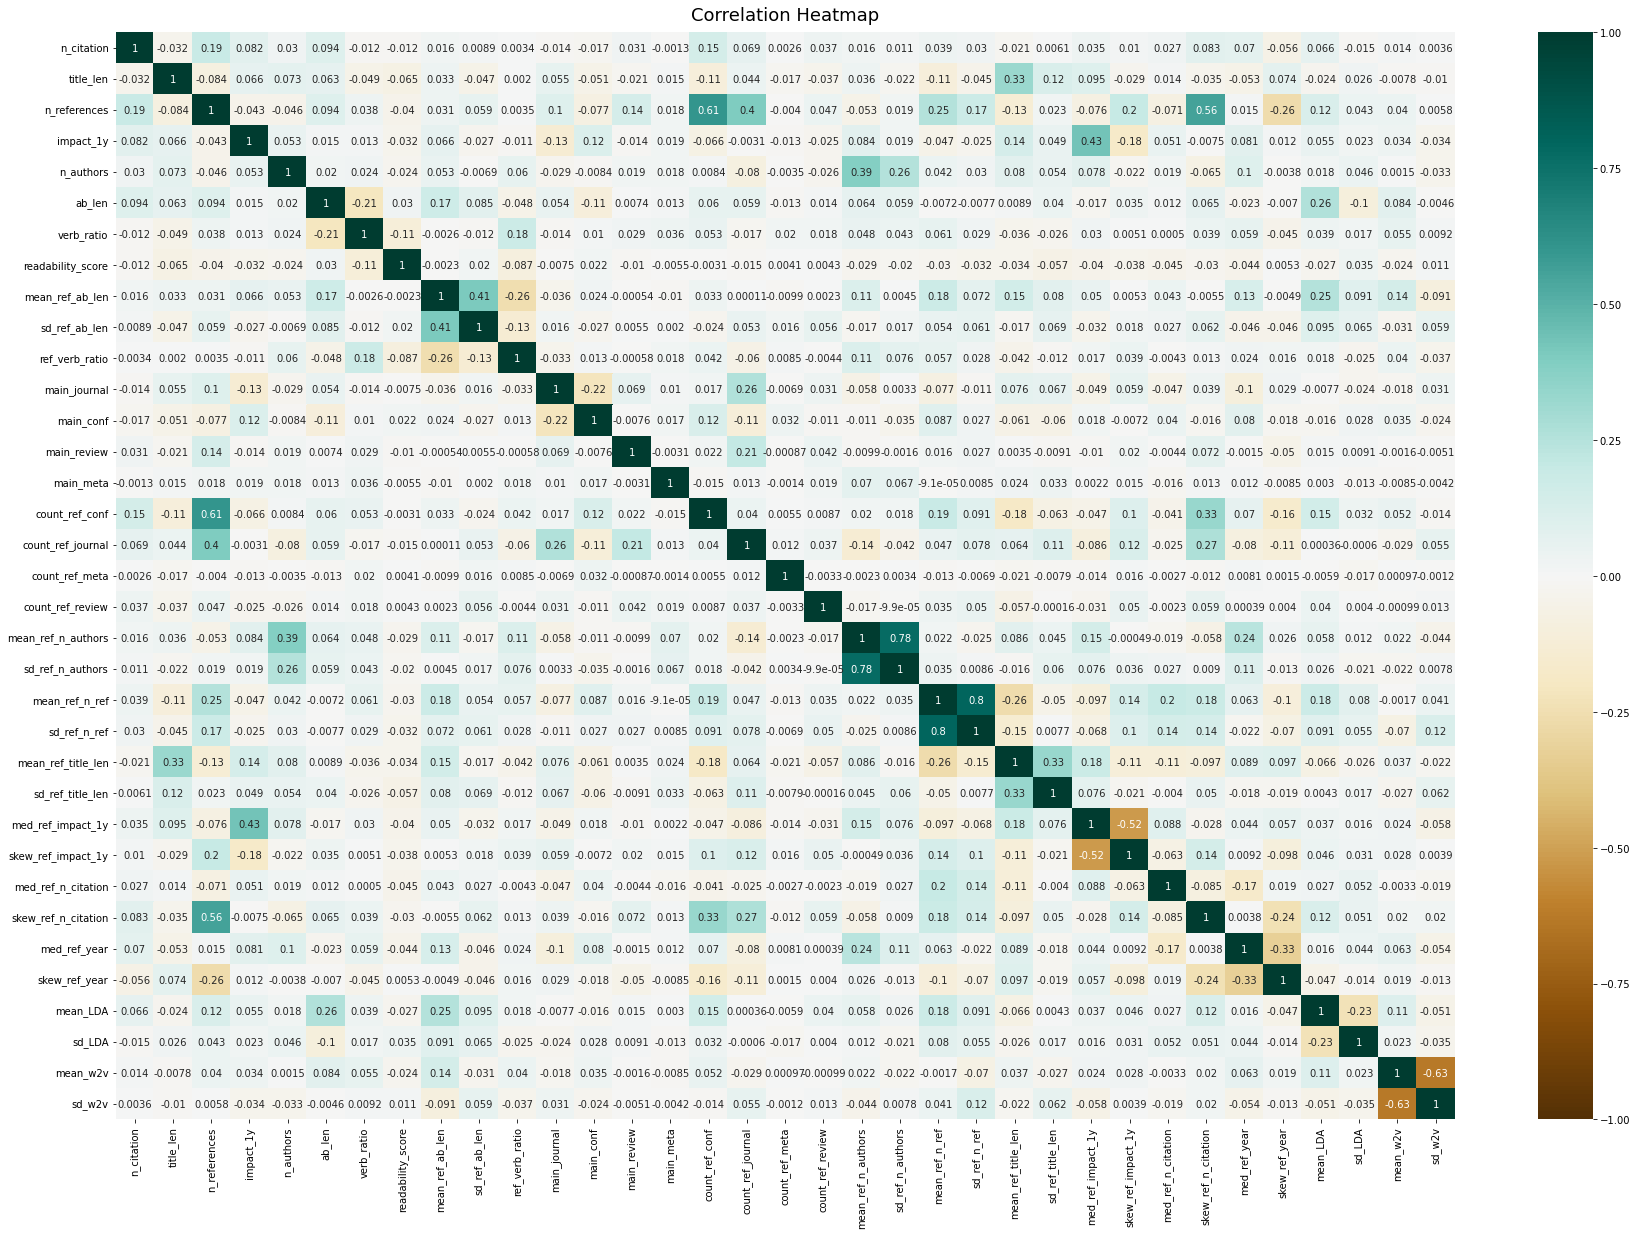

In [ ]:
corr = df_main.corr()

plt.figure(figsize=(30 , 20))

heatmap = sns.heatmap(df_main.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('/content/drive/My Drive/Colab Notebooks/plots/heatmap.png', dpi=300, bbox_inches='tight')




In [ ]:

df_main['mean_w2v'].describe()

count    2569.000000
mean        0.976390
std         0.028045
min         0.000000
25%         0.973271
50%         0.980355
75%         0.985406
max         1.000000
Name: mean_w2v, dtype: float64

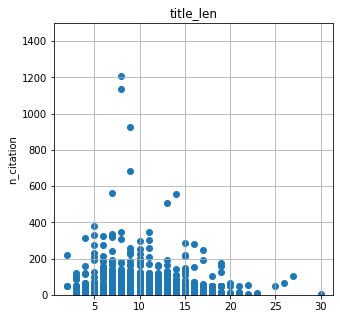

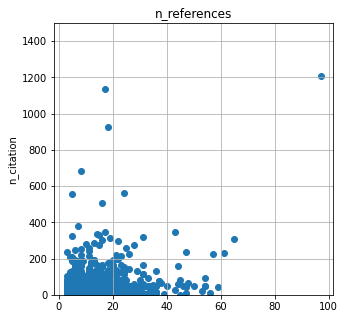

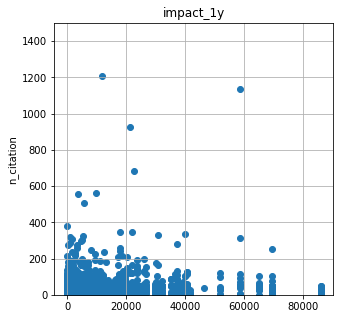

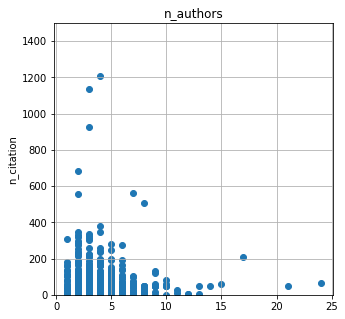

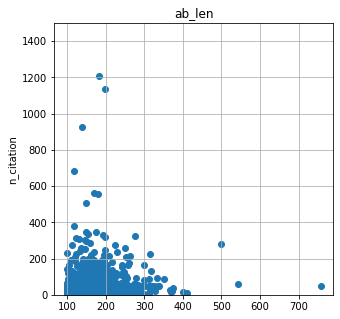

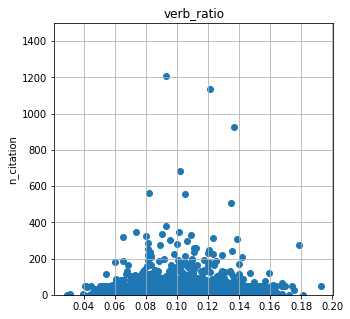

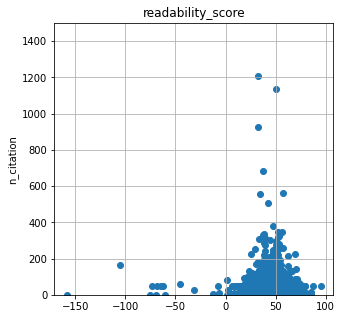

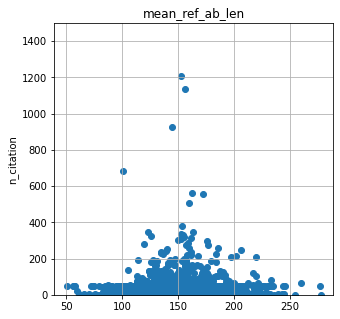

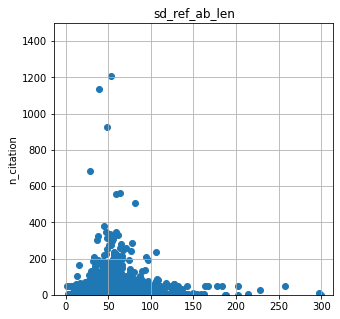

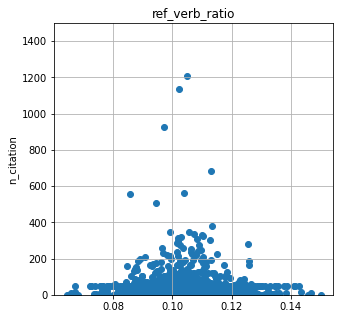

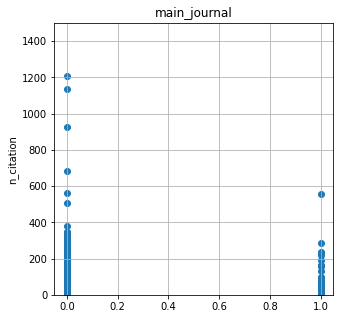

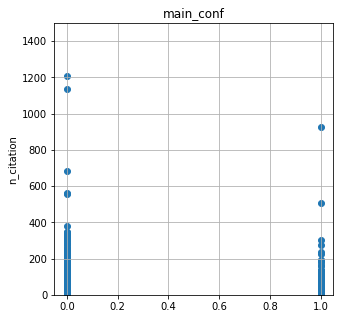

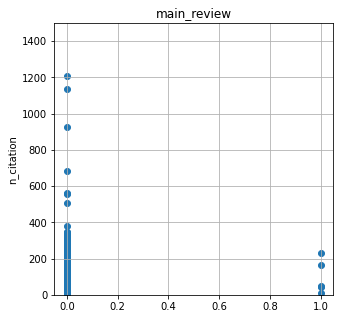

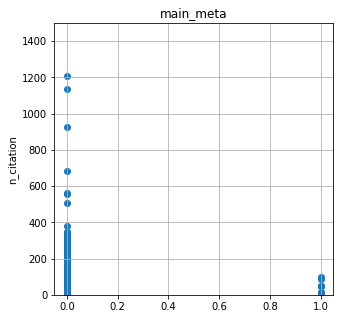

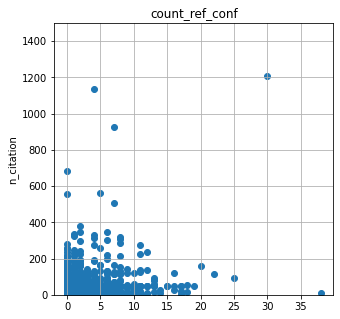

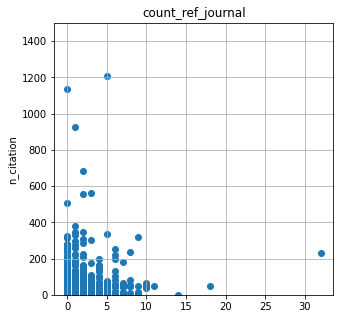

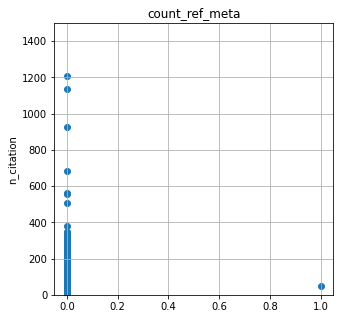

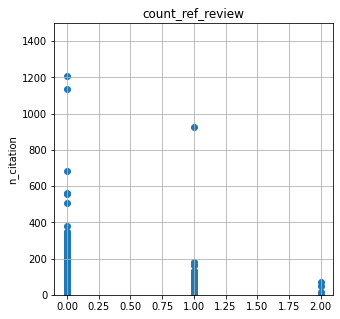

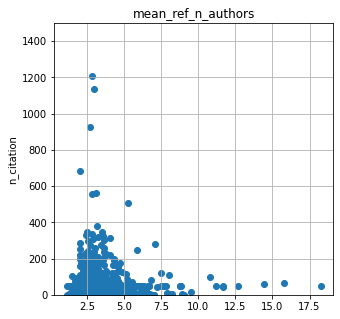

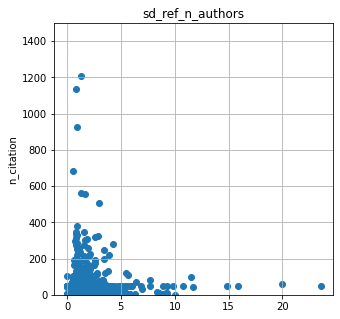

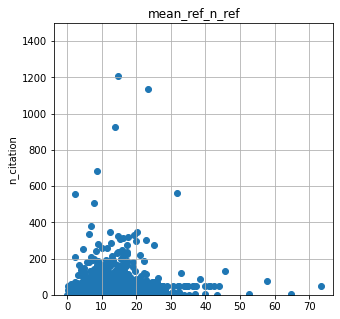

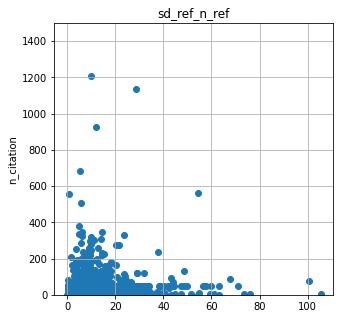

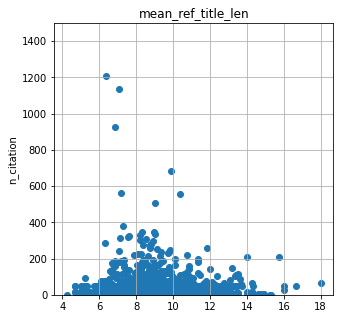

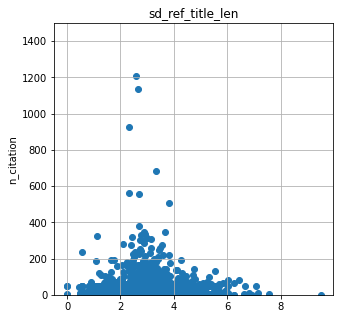

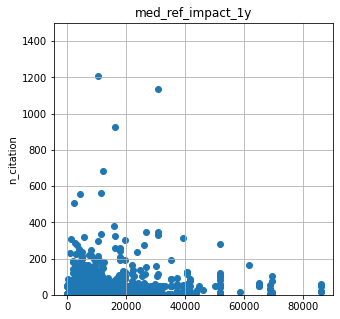

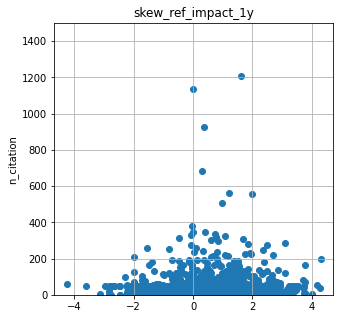

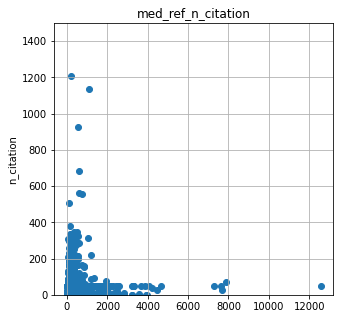

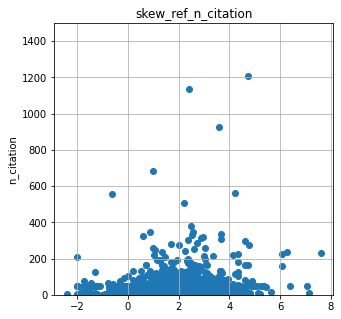

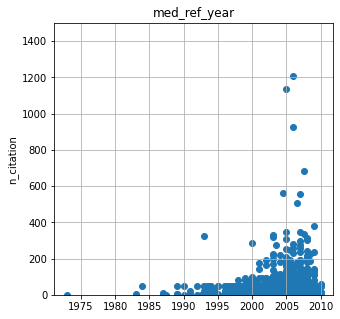

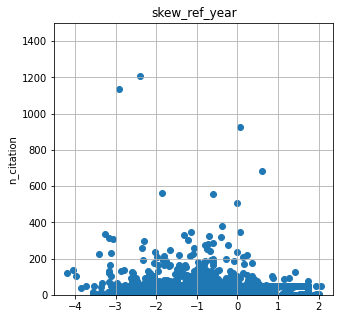

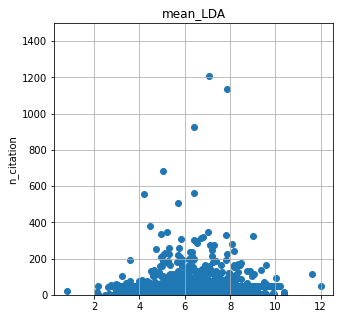

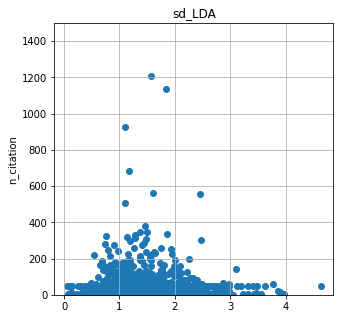

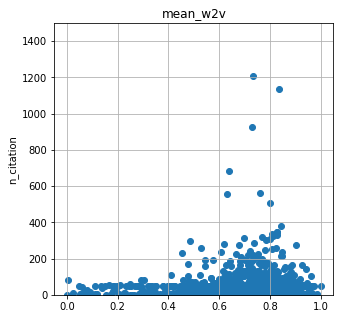

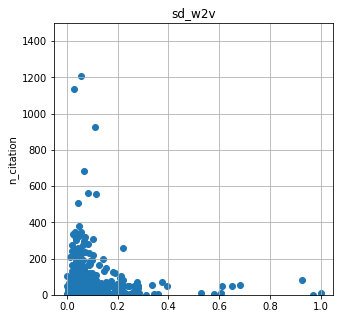

In [ ]:
#correlation with n_citation
for i in list(df_main.columns)[1:]:
    x_list = i
    x = df_main[x_list]
    y = df_main['n_citation']
    
    plt.figure(figsize=(5,5))
    plt.scatter(x, y, marker='o')
    plt.grid()
    plt.ylim(ymin=0, ymax=1500)
    
    plt.ylabel("n_citation")
    plt.title(x_list)

    plt.subplots_adjust(hspace = 1)
    plt.savefig("/content/drive/My Drive/Colab Notebooks/plots/"+ str(i) + ".png")
    plt.show()



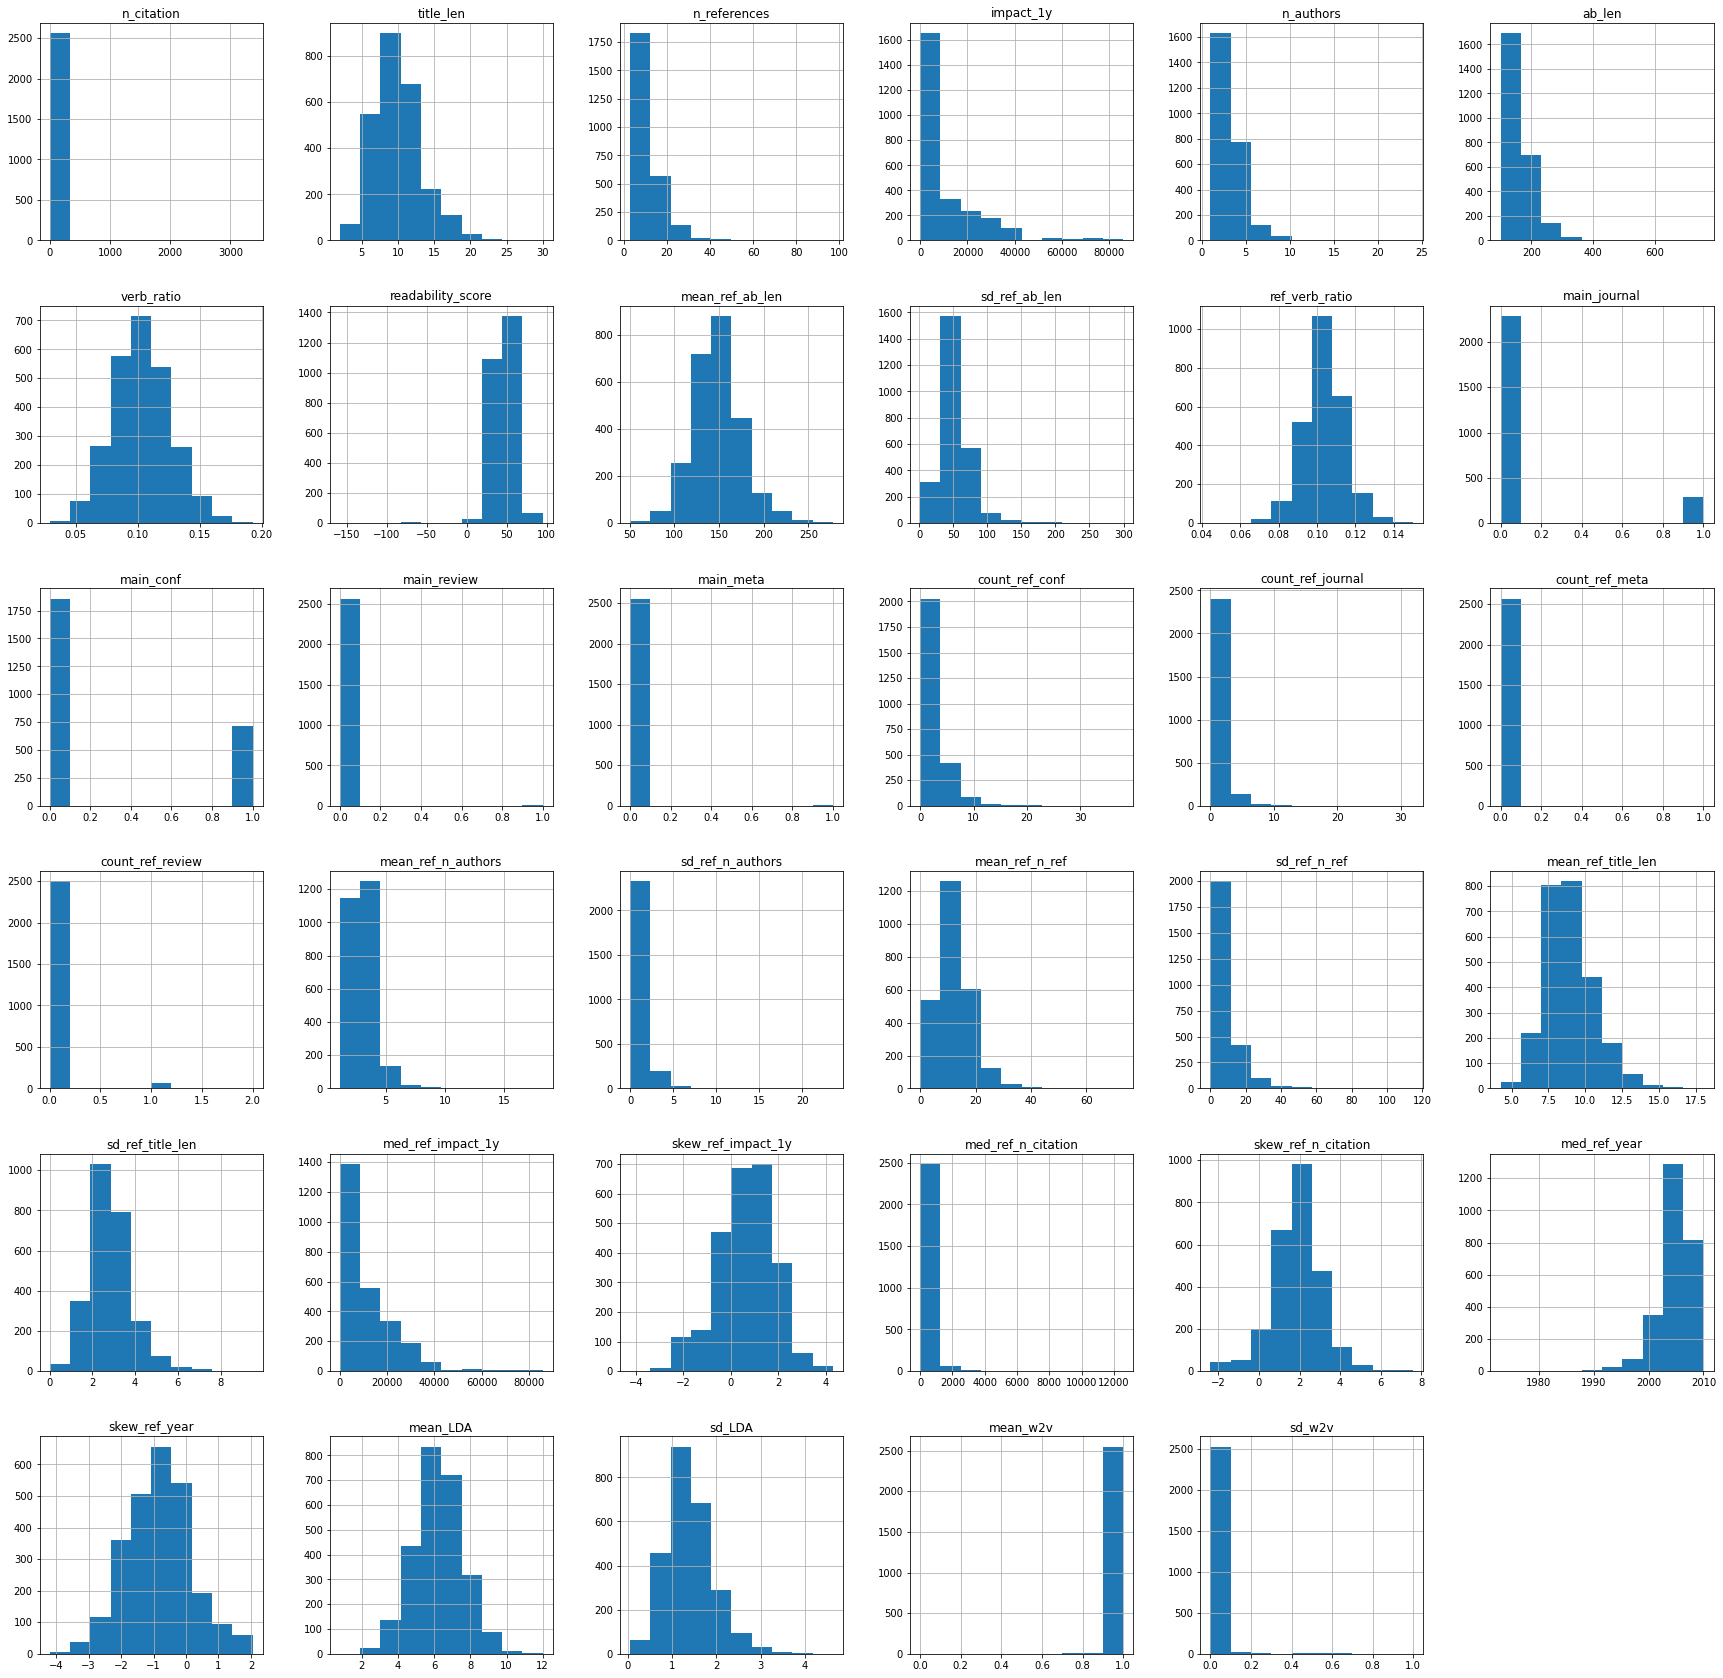

In [ ]:
#Histogram

from matplotlib import pyplot
df_main.hist(figsize = (30,  30), bins=10)
plt.savefig("/content/drive/My Drive/Colab Notebooks/plots/"+"histogram2.png")
pyplot.show()

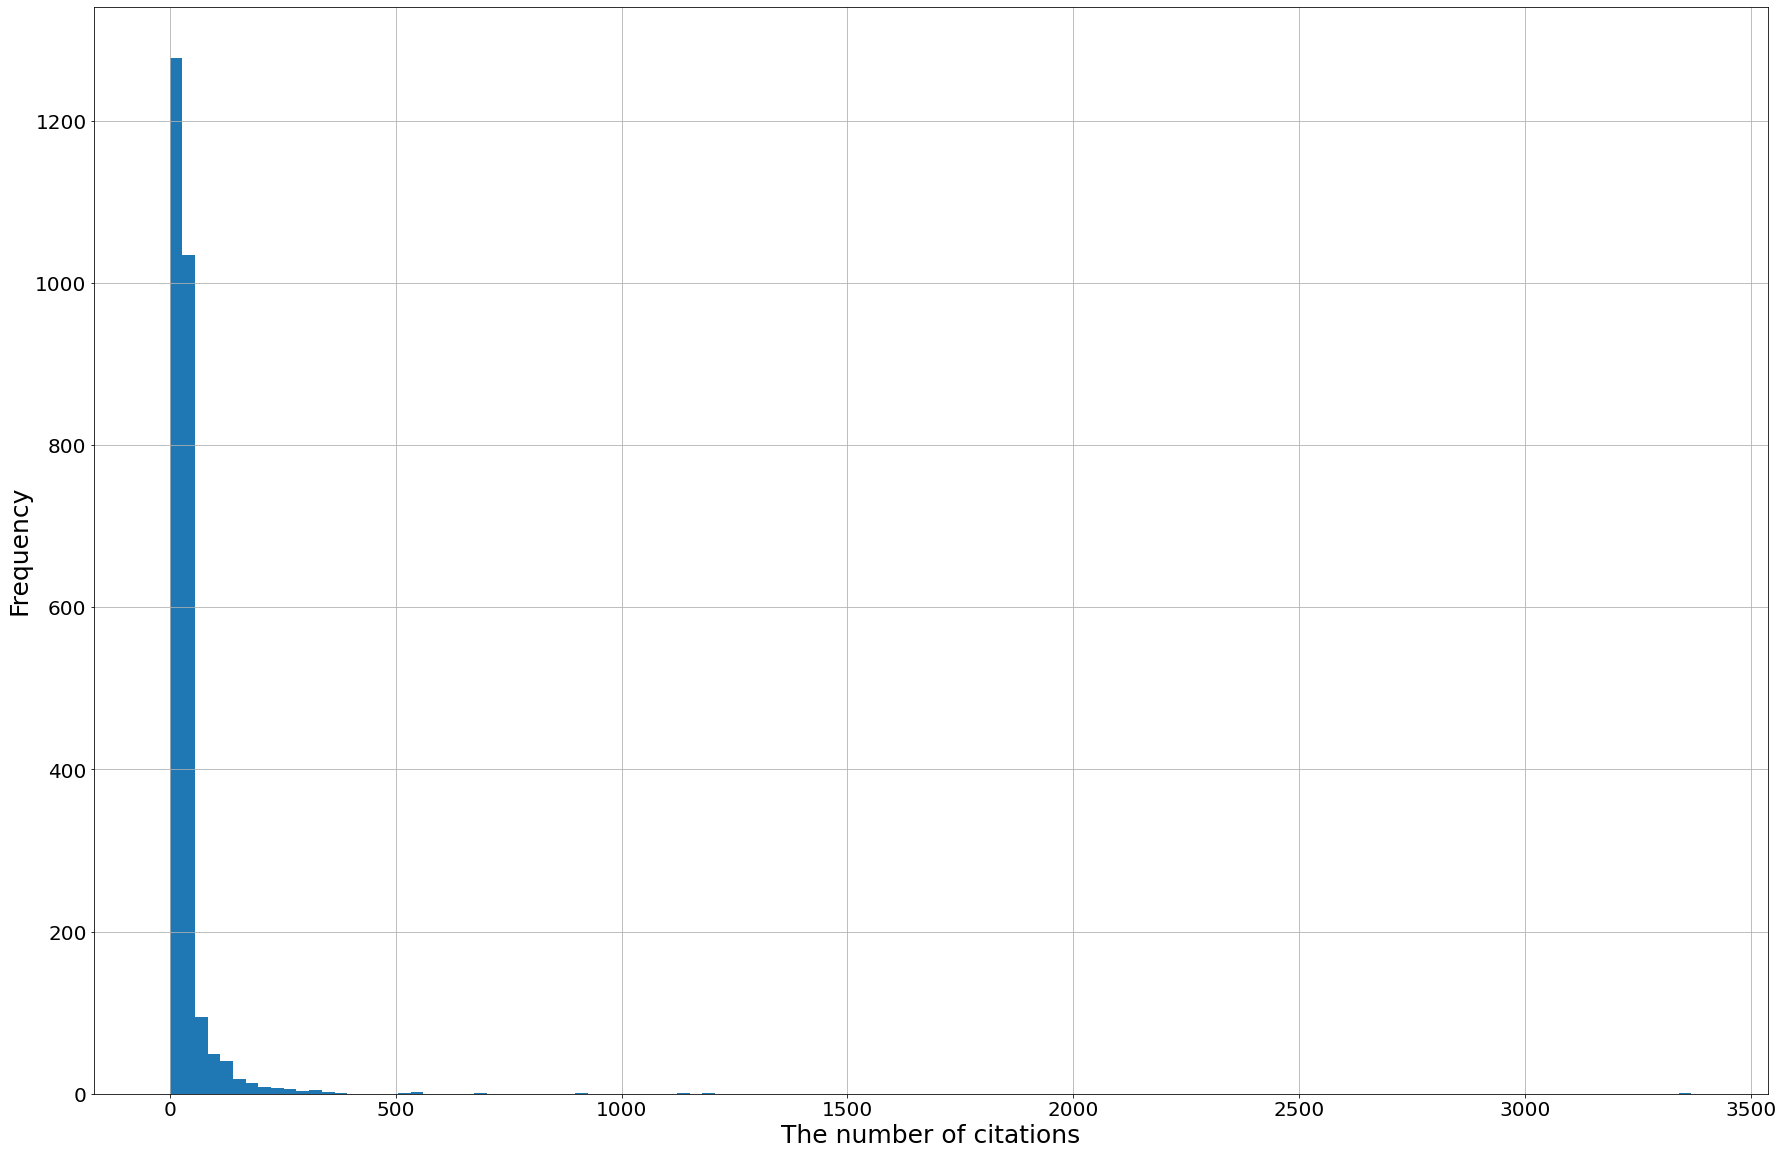

In [ ]:
from matplotlib import pyplot
df_main['n_citation'].hist(figsize = (30,  20), bins=120)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('The number of citations', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.savefig("/content/drive/My Drive/Colab Notebooks/plots/"+"histogram_citation.png")

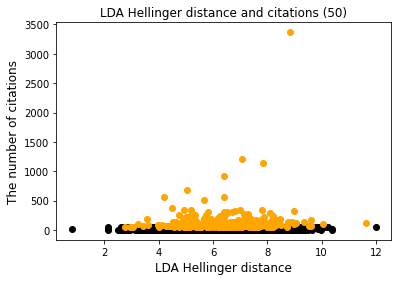

In [ ]:
x = df_main_scaled['mean_LDA']
y = df_main_scaled['n_citation']

ygt50 = y>50
plt.scatter(x[~ygt50], y[~ygt50], color='black')
plt.scatter(x[ygt50], y[ygt50], color='orange')
plt.title('LDA Hellinger distance and citations (50)')
plt.xlabel('LDA Hellinger distance', fontsize=12)
plt.ylabel('The number of citations', fontsize=12)
plt.savefig("/content/drive/My Drive/Colab Notebooks/plots/nonlinearLDA50.png")
plt.show()
    

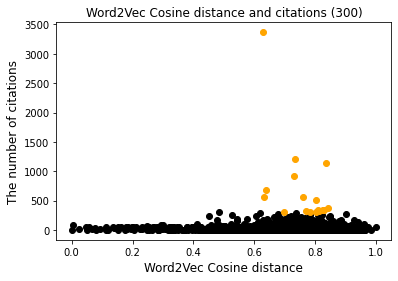

In [ ]:
x = df_main_scaled['mean_w2v']
y = df_main_scaled['n_citation']

ygt50 = y>300
plt.scatter(x[~ygt50], y[~ygt50], color='black')
plt.scatter(x[ygt50], y[ygt50], color='orange')
plt.title('Word2Vec Cosine distance and citations (300)')
plt.xlabel('Word2Vec Cosine distance', fontsize=12)
plt.ylabel('The number of citations', fontsize=12)
plt.savefig("/content/drive/My Drive/Colab Notebooks/plots/nonlinearw2v300.png")
plt.show()

In [ ]:
df_main.to_csv("/content/drive/My Drive/Colab Notebooks/df_main_final_scaled.csv")